https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

Task 1 - Predict Heart Failure using Classification

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [3]:
def subplotting_model(n_rows, m_cols, plot_cl, p_figsize, s_title, x_axis, metric_y):
    
    '''
    n_rows, m_cols (int): subplot size
    plot_cl (Bool): Constrained layout of subplots
    p_figsize (tuple): total figure size 
    
    s_title(str): sup_title, the title to whole figure
    
    x_axis (range function : range(a,b)): range of x plotting 
    
    metric_y (Nested dictionary) = nested dictionart of sub_plot location range(0, nrows*ncols),
            metric name (str) and y_values to plot(list).
                * please note index 0: will be the lead metric and max pointer to the rest of the plots. 
    '''
    fig, axes = plt.subplots(n_rows, m_cols,constrained_layout = plot_cl,  figsize = p_figsize)
    fig.suptitle(s_title, fontsize='x-large', fontweight='bold')

    plots = n_rows*m_cols #num of figures to plot
    
    # Index starts at 0, values start an x_range[0]
    metric_0 = list(metric_y.get(0).values())[0]
    x_max_index = metric_0.index(max(metric_0))
    
    x_max_plot = x_max_index + x_axis[0]
    
    for i in range (plots):
        metric = list(metric_y.get(i).keys())[0]
        values =  list(metric_y.get(i).values())[0]
        
        axes[i].plot(x_axis,values)
        axes[i].set_title(metric)
        
        max_val = values[x_max_index]
        
        axes[i].annotate("{}: {:.2f}".format(x_max_plot, round(max_val, 2)),
                 xy = (x_max_plot,max_val), xytext = (x_max_plot,1.005*max_val),
                         color='red', fontsize='medium', fontweight='bold')
        axes[i].plot(x_max_plot,max_val, 'ro')

In [4]:
db = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [5]:
db.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
#Extra column not part of this classification task 

db.drop(columns = 'time', axis = 1, inplace = True)

In [7]:
db.info()

# 299 rows all non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


In [8]:
x = db['DEATH_EVENT'].value_counts()
print(x) 

#un-balanced problem, Should use F1-score and recall for classification model

0    203
1     96
Name: DEATH_EVENT, dtype: int64


# Data Analysis 

<AxesSubplot:>

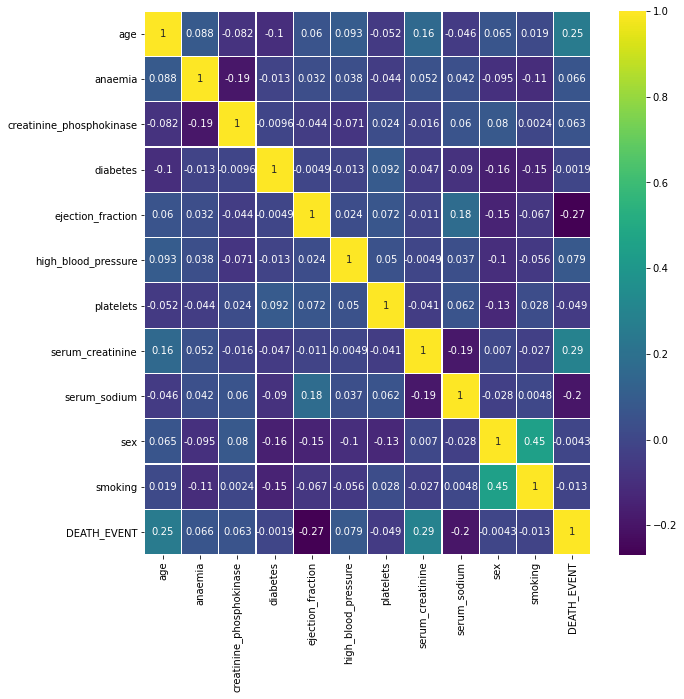

In [9]:
f = plt.figure(figsize=(10,10))
sns.heatmap(db.corr(), cmap='viridis', annot=True, linewidths=0.2)

In [10]:
correlation= db.corr()['DEATH_EVENT']
correlation

# Highest correlation rate is between death-event and age, serum_creatinine, serum_sodium and ejection_fraction

age                         0.253729
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
ejection_fraction          -0.268603
high_blood_pressure         0.079351
platelets                  -0.049139
serum_creatinine            0.294278
serum_sodium               -0.195204
sex                        -0.004316
smoking                    -0.012623
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

In [11]:
correlation_sex= db.corr()['sex']
correlation_sex

age                         0.065430
anaemia                    -0.094769
creatinine_phosphokinase    0.079791
diabetes                   -0.157730
ejection_fraction          -0.148386
high_blood_pressure        -0.104615
platelets                  -0.125120
serum_creatinine            0.006970
serum_sodium               -0.027566
sex                         1.000000
smoking                     0.445892
DEATH_EVENT                -0.004316
Name: sex, dtype: float64

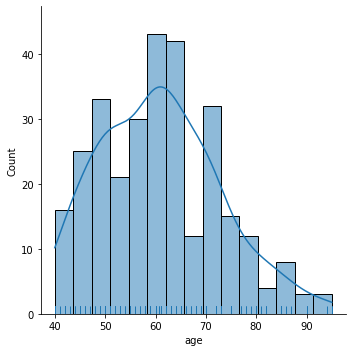

In [13]:
# Age distribution Vs Death_Event 

sns.displot(x=db['age'], kde=True, rug=True, bins = 15)

# age distribution similar to normal distribution, most of patients are in their 50-60 age

<AxesSubplot:xlabel='age', ylabel='Count'>

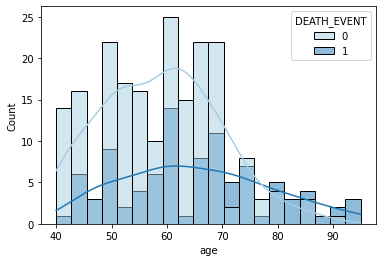

In [14]:
sns.histplot(x=db['age'], hue = 'DEATH_EVENT', data = db, bins = 20, kde = True ,palette = 'Paired')

<AxesSubplot:xlabel='serum_creatinine', ylabel='Count'>

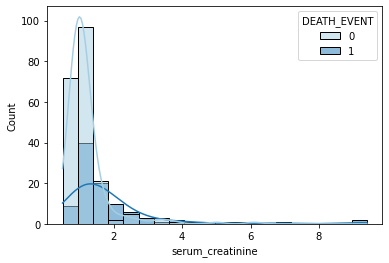

In [15]:
sns.histplot(x=db['serum_creatinine'], hue = 'DEATH_EVENT', data = db, bins = 20, kde = True ,palette = 'Paired')

<AxesSubplot:xlabel='ejection_fraction', ylabel='Count'>

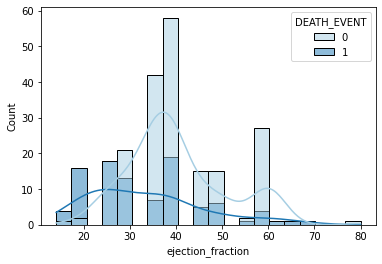

In [16]:
sns.histplot(x=db['ejection_fraction'], hue = 'DEATH_EVENT', data = db, bins = 20, kde = True ,palette = 'Paired')

# Skewed data

<AxesSubplot:xlabel='serum_sodium', ylabel='Count'>

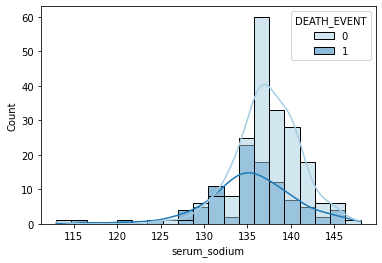

In [17]:
sns.histplot(x=db['serum_sodium'], hue = 'DEATH_EVENT', data = db, bins = 20, kde = True ,palette = 'Paired')

# not normally distibuted

First model will be only with top 4 features with high(abs) correlation to death_event

In [18]:
X_mod1 = db[['age', 'serum_creatinine', 'serum_sodium', 'ejection_fraction']]
Y = db['DEATH_EVENT']

### Feature Engineering :
- Cleaning outliers if needed
- Normalization of data if not normaled 
- Exploaration of attributes to create new features

<AxesSubplot:xlabel='ejection_fraction'>

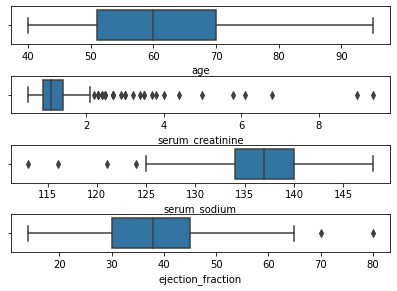

In [19]:
fig, axes = plt.subplots(4,1) 
fig.tight_layout()
sns.boxplot(x='age', data = X_mod1,ax=axes[0])
sns.boxplot(x='serum_creatinine', data = X_mod1, ax=axes[1])
sns.boxplot(x='serum_sodium', data = X_mod1, ax=axes[2])
sns.boxplot(x='ejection_fraction', data = X_mod1, ax=axes[3])

In [20]:
'''serum_sodium (mEq/L)
The normal range for blood sodium levels is 135 to 145
Meaning even though it seems we have a big outlier, this is normal range and important to our model classification'''

print(X_mod1['serum_sodium'].min())
print(X_mod1['serum_sodium'].max())

113
148


In [21]:
 '''serum_creatinine (mg/dL)
 0.7 to 1.2 milligrams per deciliter (mg/dL) for men and 0.5 to 1.0 mg/dL for women
 Above values may indicate heart condition'''

print(X_mod1['serum_creatinine'].min())
print(X_mod1['serum_creatinine'].max())

0.5
9.4


In [22]:
'''ejection_fraction (percentage)
 Normal 55-75%
 By reaserch - higher or lower values may indicate heart condition, meaning cleaning the outliers may hurt our 
 model efficiency '''

print(X_mod1['ejection_fraction'].min())
print(X_mod1['ejection_fraction'].max())

14
80


In [26]:
# 3 features input 

X_mod_transf = (X_mod1-X_mod1.mean())/X_mod1.std()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

In [28]:
x_trn,x_tes, y_trn, y_tes = train_test_split(X_mod_transf, Y, test_size=0.2, random_state=1)

In [29]:
model1 = LogisticRegression()
model1.fit(x_trn,y_trn)

LogisticRegression()

In [30]:
pred = model1.predict(x_tes)

In [31]:
model1.score(x_tes,y_tes)

0.8166666666666667

In [32]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, classification_report, roc_auc_score

<AxesSubplot:>

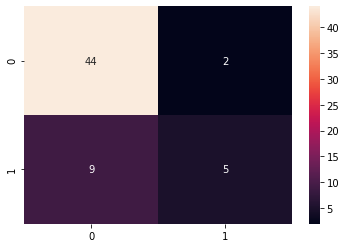

In [33]:
con_mat= pd.DataFrame(data = confusion_matrix(y_tes, pred))
sns.heatmap(data=con_mat, annot=True)

In [34]:
clss_rp = classification_report(y_tes, pred, labels = [0,1], output_dict=True)
clss_report = pd.DataFrame(data = clss_rp).transpose()
clss_report

# Low recall meaning the model can't classify the True lable correctly

,precision,recall,f1-score,support
0,0.830189,0.956522,0.888889,46.000000
1,0.714286,0.357143,0.476190,14.000000
accuracy,0.816667,0.816667,0.816667,0.816667
macro avg,0.772237,0.656832,0.682540,60.000000
weighted avg,0.803145,0.816667,0.792593,60.000000


In [36]:
'''Analysis of Logistic Regression over all given features with no transformation over them'''

X = db.drop('DEATH_EVENT', axis = 1)
Y = np.array(db['DEATH_EVENT'])

In [37]:
x_train ,x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

model2 = LogisticRegression()
model2.fit(x_train,y_train)
pred2 = model2.predict(x_test)
print(model2.score(x_test, y_test))

0.8222222222222222


<AxesSubplot:>

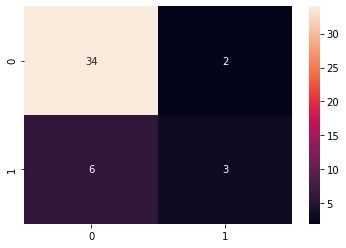

In [38]:
con_mat2= pd.DataFrame(data = confusion_matrix(y_test, pred2))
sns.heatmap(data=con_mat2, annot=True)

In [39]:
print(roc_auc_score(y_test, pred2))

0.6388888888888888


In [40]:
clss_rp2 = classification_report(y_test, pred2, labels = [0,1], output_dict=True)
clss_report2 = pd.DataFrame(data = clss_rp2).transpose()
clss_report2

# We have some improvement, but still recall score is less then 0.5, meaning 50% of class-1 are being True values
# are being missed

,precision,recall,f1-score,support
0,0.850000,0.944444,0.894737,36.000000
1,0.600000,0.333333,0.428571,9.000000
accuracy,0.822222,0.822222,0.822222,0.822222
macro avg,0.725000,0.638889,0.661654,45.000000
weighted avg,0.800000,0.822222,0.801504,45.000000


By adding all features, we reduced the recall score - meaning the model is less able to find people with 
suspision to heart failure, probably because some of the input features and noisy and not relvant for the classification

Desicion Tree and Random Forest Algorithms  
A) to predict 
                                  
B) feature importance 

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

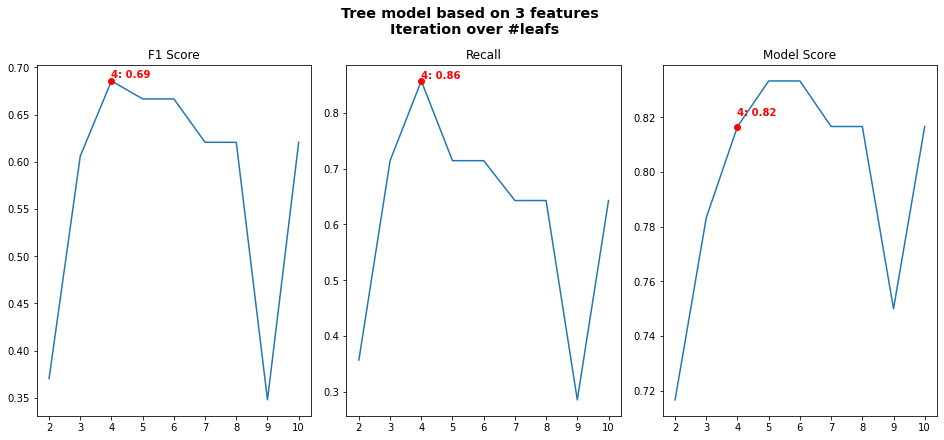

In [42]:
# First we will see the tree over our 3-feature dataset (x_trn,x_tes, y_trn, y_tes)

f1_tree_3feat = []
recall_tree_3feat = []
score_tree_3feat = []

for leaf in range(2,11):
    tree = DecisionTreeClassifier(max_leaf_nodes=leaf, random_state=1)
    tree.fit(x_trn,y_trn)
    pred = tree.predict(x_tes)
    recall_tree_3feat.append(recall_score(y_tes,pred))
    f1_tree_3feat.append(f1_score(y_tes,pred))
    score_tree_3feat.append(tree.score(x_tes,y_tes))
    
dict_tree_3 = {
    0: {'F1 Score' : f1_tree_3feat},
    1: {'Recall': recall_tree_3feat},
    2: {'Model Score': score_tree_3feat }  
}

stitle = 'Tree model based on 3 features \n Iteration over #leafs'
x_ax = range(2,11)

subplotting_model(1, 3, plot_cl = True, p_figsize=(13,6), s_title=stitle, x_axis=x_ax, metric_y=dict_tree_3)


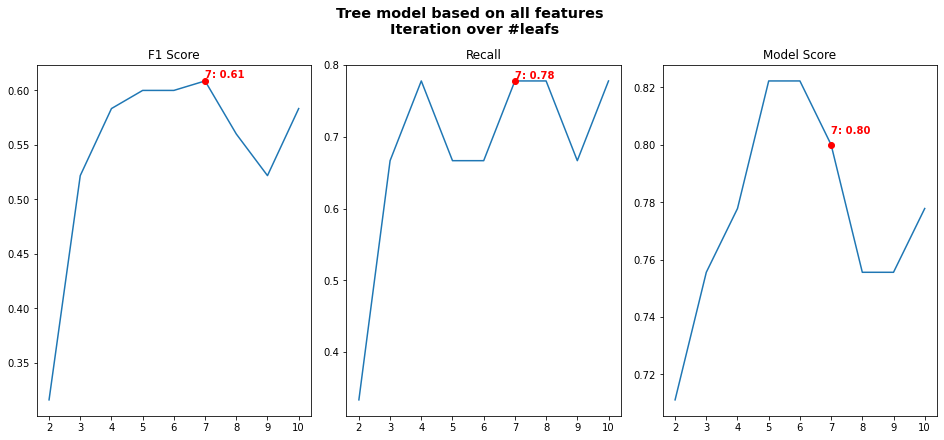

In [43]:
# Second we will see the tree over all-feature dataset (x_train ,x_test, y_train, y_test)

f1_tree_all_feat = []
recall_tree_all_feat = []
score_tree_all_feat = []

for leaf in range(2,11):
    tree = DecisionTreeClassifier(max_leaf_nodes=leaf, random_state=1)
    tree.fit(x_train,y_train)
    pred = tree.predict(x_test)
    recall_tree_all_feat.append(recall_score(y_test,pred))
    f1_tree_all_feat.append(f1_score(y_test,pred))
    score_tree_all_feat.append(tree.score(x_test,y_test))
    
dict_tree_all = {
    0: {'F1 Score' : f1_tree_all_feat},
    1: {'Recall': recall_tree_all_feat},
    2: {'Model Score': score_tree_all_feat }  
}

stitle = 'Tree model based on all features \n Iteration over #leafs'
x_ax = range(2,11)

subplotting_model(1, 3, plot_cl = True, p_figsize=(13,6), s_title=stitle, x_axis=x_ax, metric_y=dict_tree_all)

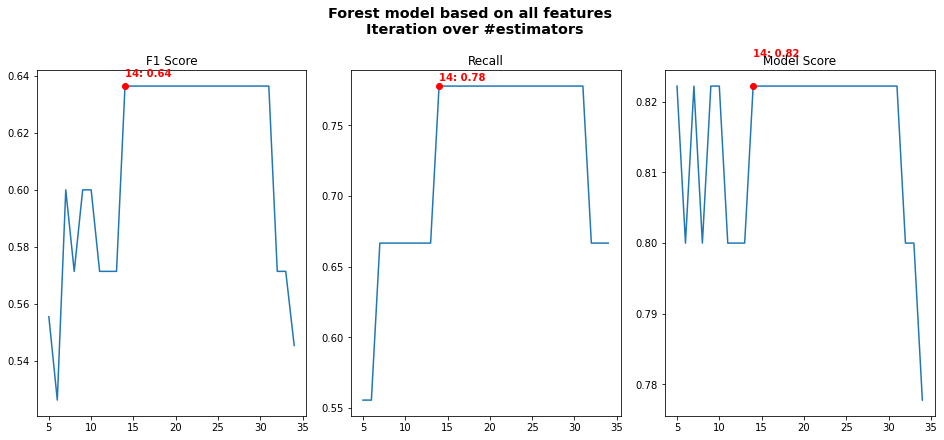

In [44]:
# Random Forest Classifier over all-feature dataset (x_train ,x_test, y_train, y_test)

f1_forest_all_feat = []
recall_forest_all_feat = []
score_forest_all_feat = []

for estimator in range(5,35):
    forest = RandomForestClassifier(n_estimators = estimator, criterion ='gini', random_state=1, max_features=4
                                    ,max_depth=8)
    forest.fit(x_train,y_train)
    pred = forest.predict(x_test)
    recall_forest_all_feat.append(recall_score(y_test,pred))
    f1_forest_all_feat.append(f1_score(y_test,pred))
    score_forest_all_feat.append(forest.score(x_test,y_test))
    
dict_forest = {
    0: {'F1 Score' : f1_forest_all_feat},
    1: {'Recall': recall_forest_all_feat},
    2: {'Model Score': score_forest_all_feat }  
}

stitle = 'Forest model based on all features \n Iteration over #estimators'
x_ax = range(5,35)

subplotting_model(1, 3, plot_cl = True, p_figsize=(13,6), s_title=stitle, x_axis=x_ax, metric_y=dict_forest)    


In [45]:
from sklearn.neighbors import KNeighborsClassifier

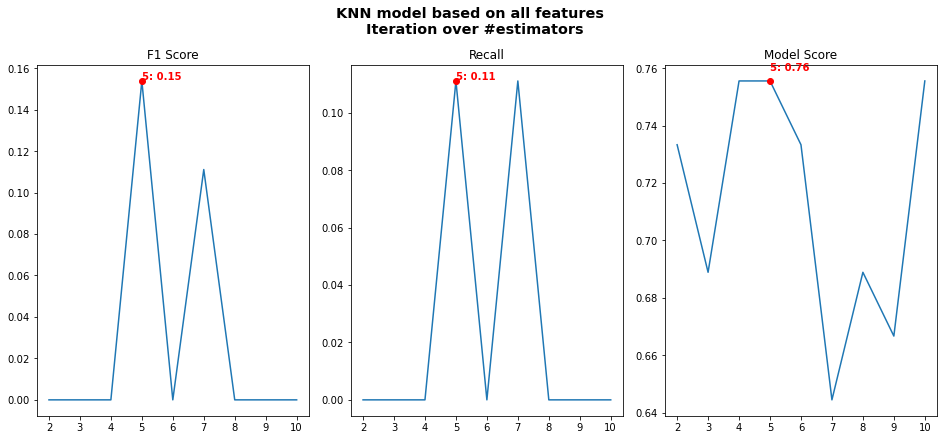

In [46]:
# K Nearest Neighbor Classifier over all-feature dataset (x_train ,x_test, y_train, y_test)

f1_kneigh_all_feat = []
recall_kneigh_all_feat = []
score_kneigh_all_feat = []


for neighbor in range(2,11):
    KNC = KNeighborsClassifier(n_neighbors = neighbor,p=5)
    KNC.fit(x_train,y_train)
    pred = KNC.predict(x_test)
    recall_kneigh_all_feat.append(recall_score(y_test,pred))
    f1_kneigh_all_feat.append(f1_score(y_test,pred))
    score_kneigh_all_feat.append(KNC.score(x_test,y_test))
    
dict_KNN = {
    0: {'F1 Score' : f1_kneigh_all_feat},
    1: {'Recall': recall_kneigh_all_feat},
    2: {'Model Score': score_kneigh_all_feat }  
}

stitle = 'KNN model based on all features \n Iteration over #estimators'
x_ax = range(2,11)

subplotting_model(1, 3, plot_cl = True, p_figsize=(13,6), s_title=stitle, x_axis=x_ax, metric_y=dict_KNN)    


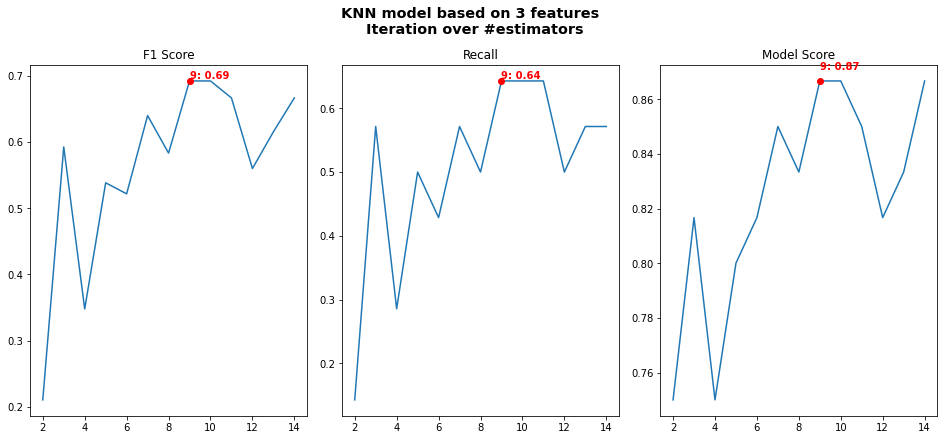

In [47]:
# K Nearest Neighbor Classifier over 3-feature dataset (x_trn, x_tes, y_trn, y_tes)

f1_kneigh_3feat = []
recall_kneigh_3feat = []
score_kneigh_3feat = []


for neighbor in range(2,15):
    KNC = KNeighborsClassifier(n_neighbors = neighbor)
    KNC.fit(x_trn,y_trn)
    pred = KNC.predict(x_tes)
    recall_kneigh_3feat.append(recall_score(y_tes,pred))
    f1_kneigh_3feat.append(f1_score(y_tes,pred))
    score_kneigh_3feat.append(KNC.score(x_tes,y_tes))
    
dict_KNN = {
    0: {'F1 Score' : f1_kneigh_3feat},
    1: {'Recall': recall_kneigh_3feat},
    2: {'Model Score': score_kneigh_3feat }  
}

stitle = 'KNN model based on 3 features \n Iteration over #estimators'
x_ax = range(2,15)

subplotting_model(1, 3, plot_cl = True, p_figsize=(13,6), s_title=stitle, x_axis=x_ax, metric_y=dict_KNN)    

As we can see in the latest 2 KNN models - while using all features will get us with highest f1-score of 0.15 with 0.16 recall
(which are the important metrics, since our goal is to detect people indangered with heart failure) , 
when reducing the feature spcae to 3 most correleted features - the f1-score increases to 0.64, still not best, with 0.69 recall
(Meaning over 50% of true values were detected and True)

Cross validation: 

the best model from the above is tree-based model with 4 leafs,
now we will check the efficency of cross validation to this data set and model

In [48]:
from sklearn.model_selection import cross_validate

In [51]:
tree_4 = DecisionTreeClassifier(max_leaf_nodes=4, random_state=1)

sc = cross_validate(tree_4, X_mod1, Y, 
                                scoring = ['f1', 'recall','accuracy'])

print('Number cross Validation: {} (default)'.format(5))
print('avg f1:  {}'.format(np.mean(sc['test_f1'])))
print('avg recall:  {}'.format(np.mean(sc['test_recall'])))
print('avg accuracy:  {}'.format(np.mean(sc['test_accuracy'])))


Number cross Validation: 5 (default)
avg f1:  0.6601195170587518
avg recall:  0.6663157894736841
avg accuracy:  0.7794350282485876


Increse in f1 score with a minor decrease in recall score for cross-validation with 5 folds

In [52]:
tree_4 = DecisionTreeClassifier(max_leaf_nodes=4, random_state=1)

sc = cross_validate(tree_4, X_mod1, Y, cv=7,
                                scoring = ['f1', 'recall','accuracy'])
print('Number cross Validation: {}'.format(7))
print('avg f1:  {}'.format(np.mean(sc['test_f1'])))
print('avg recall:  {}'.format(np.mean(sc['test_recall'])))
print('avg accuracy:  {}'.format(np.mean(sc['test_accuracy'])))


Number cross Validation: 7
avg f1:  0.6544167039856694
avg recall:  0.717425431711146
avg accuracy:  0.7561303591203924


Increse in f1 score with an increase in recall score for cross-validation with 7 folds